# 1. Les packages

In [3]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Test de normalité
import pingouin as pg

# standarliser les données
from sklearn.preprocessing import StandardScaler

# Modèles d'algorithmes
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

# validation croisée et métriques 
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as me
from sklearn.metrics import fbeta_score

# Resample
# pip install imblearn
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Style de la visualisation
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# 2. Importation des données

In [2]:
# Importer les données
data_transac = pd.read_csv(r"C:\Users\diarr\Projets_Personnels\Detection_de_fraudes_par_carte_de_credit\creditcard.csv")

* Après imporation des données, nous allons essayer de parcourir les données pour en savoir plus;
* Ensuite faire une courte analyse exploiratoire des données pour en tirer des réponses.

## 2.1. Expoloration des données

In [3]:
# Afficher les 5 premières lignes de données
data_transac.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Forme du jeu de données
data_transac.shape

(284807, 31)

* Nous avons 284807 transactions c'est à dire chaque ligne représente une transaction avec différentes caractéristiques c'est à dire les colonnes (31 colonnes = étiquettes).

## À propos de l'ensemble de données

* L'ensemble des données contient uniquement des variables d'entrées numériques qui sont le résultat d'une transformation PCA.
* En raison de problèmes de confidentialité, nous ne pouvons pas fournir les caractéristiques originales ni davantage d'informations générales sur les données. 
* Les fonctionnalités V1, V2, … V28 sont les principales composantes obtenues avec PCA, les seules fonctionnalités qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'.
* La fonctionnalité « Temps » contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données. La fonctionnalité « Montant » correspond au montant de la transaction.
* Cette fonctionnalité peut être utilisée pour un apprentissage sensible aux coûts, en fonction d'un exemple.
* La fonctionnalité « Classe » est la variable de réponse et elle prend la valeur 1 en cas de fraude et 0 sinon.

In [5]:
# Vérification de valeurs manquantes
data_transac.isnull().any().any()

False

In [6]:
# Pourcentages des valeurs nulls
percent_null_value = round((data_transac.isnull().sum()/data_transac.shape[0]*100),2).sort_values(ascending = False)
percent_null_value

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# Vérification des doublons à partir de l'heure
data_transac[data_transac.duplicated(["Time"])].shape

(160215, 31)

In [8]:
# Vérification des doublons
data_transac[data_transac.duplicated()].shape

(1081, 31)

In [9]:
# Typages de données
info_transac = data_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Statistiques descriptives avec toutes les variables
statistique = data_transac.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


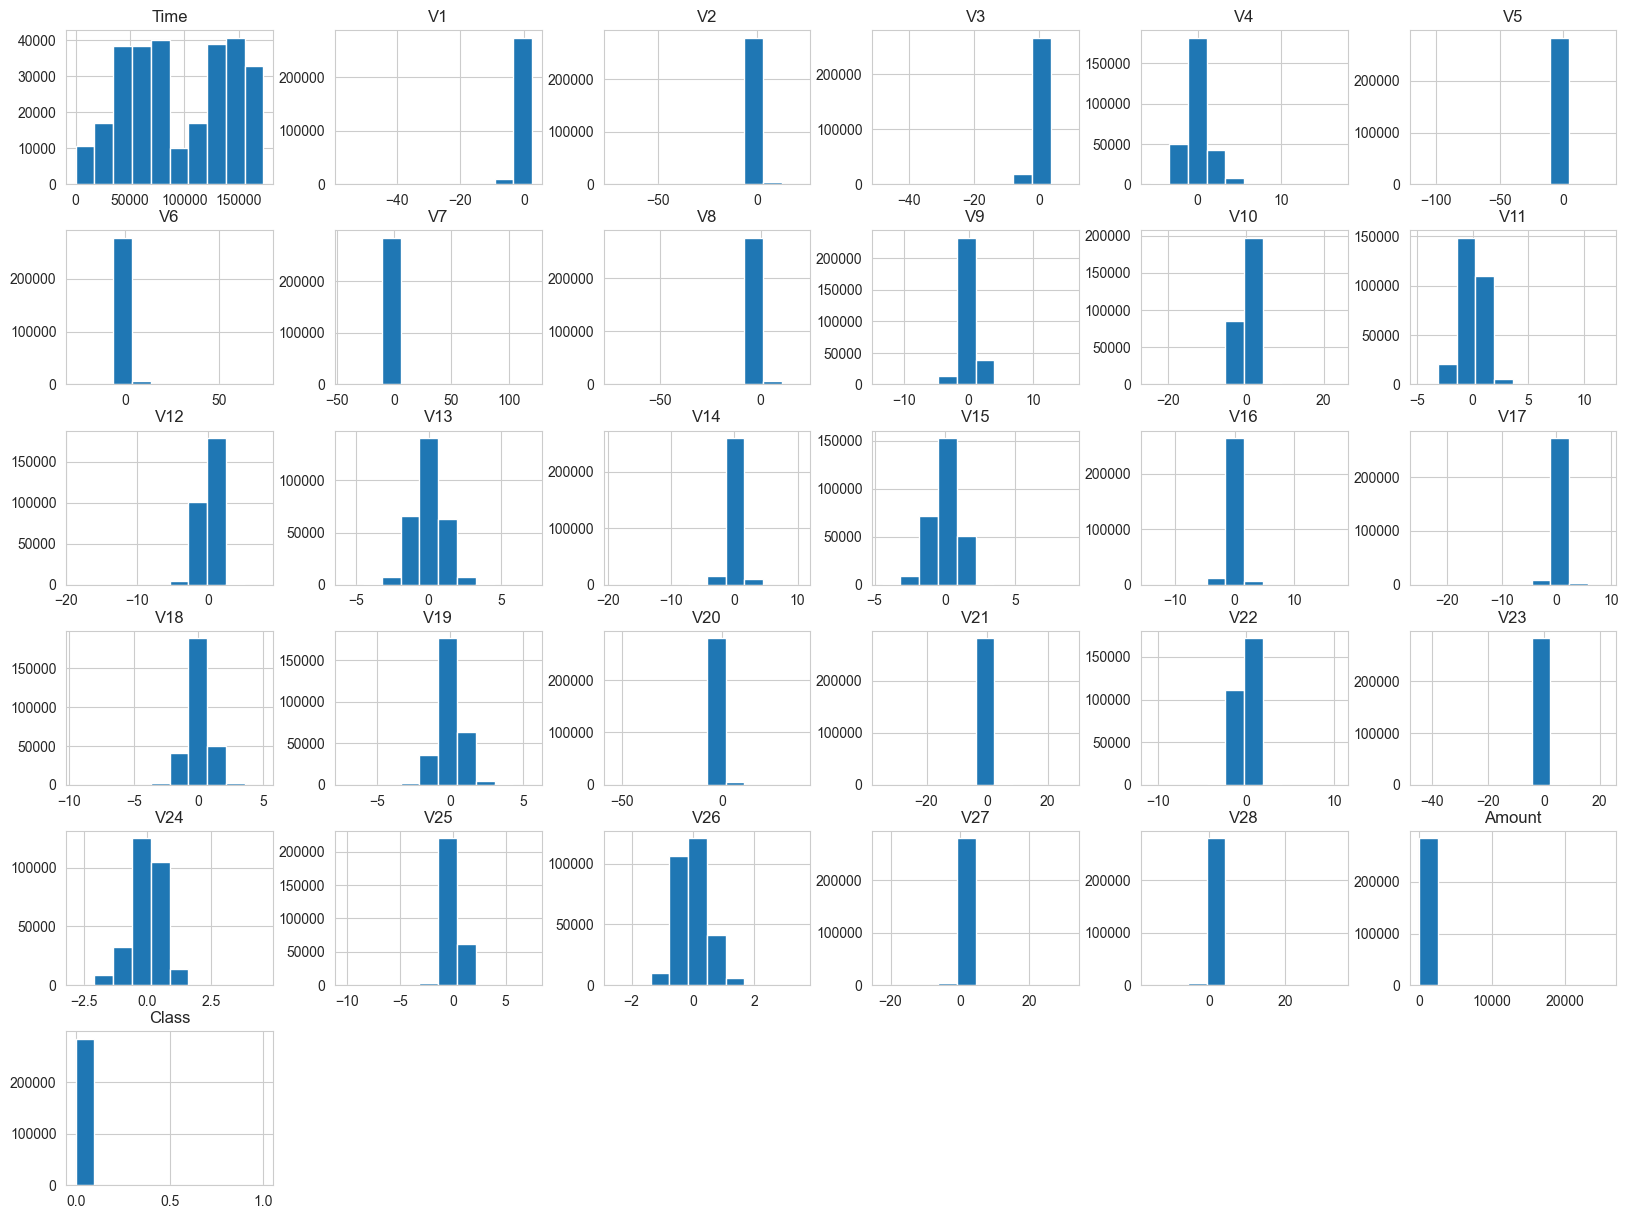

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualisation
data_transac.hist(figsize=(20,15))
plt.title("Distribution des différentes variables", fontsize = 15)
plt.show()
plt.tight_layout()

In [12]:
# test de normalité avec la librairie pingouin
pg.normality(data_transac, method ='normaltest')

,W,pval,normal
Time,936453.400109,0.000000e+00,False
V1,222086.395442,0.000000e+00,False
V2,297509.669059,0.000000e+00,False
V3,172313.138289,0.000000e+00,False
V4,35667.452068,0.000000e+00,False
V5,229535.698878,0.000000e+00,False
V6,165478.971036,0.000000e+00,False
V7,246965.098722,0.000000e+00,False
V8,419784.512978,0.000000e+00,False
V9,37276.402632,0.000000e+00,False


* Toutes les variables ne suivent pas une distribution normale.
* Par la suite nous allons vérifier la présence des outliers avec les boites à moustache.

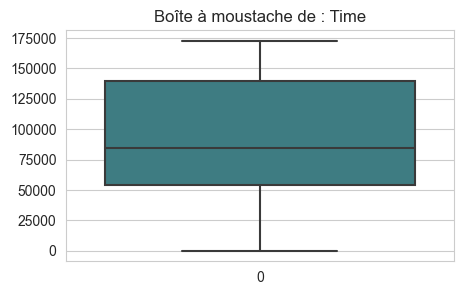

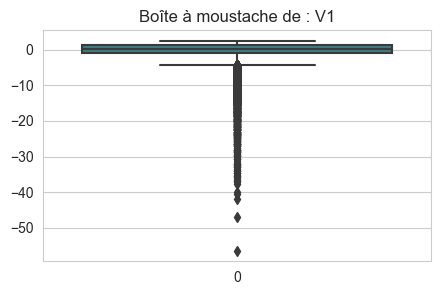

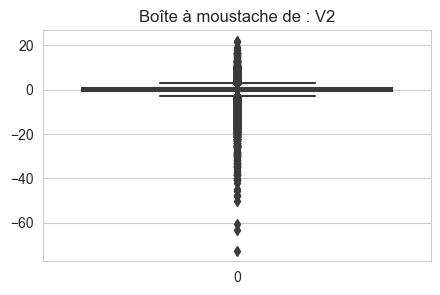

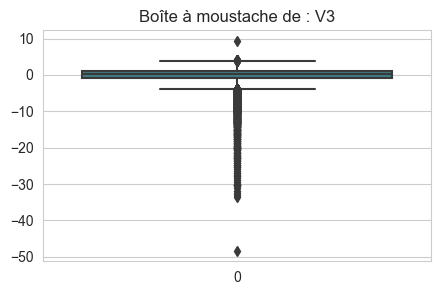

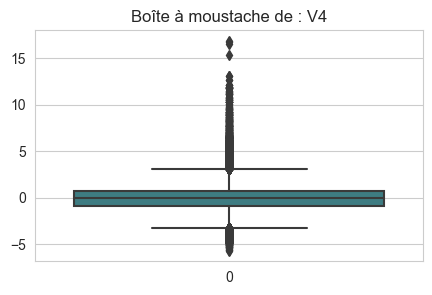

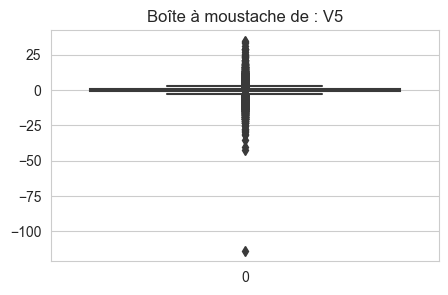

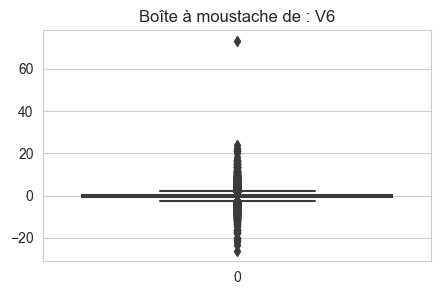

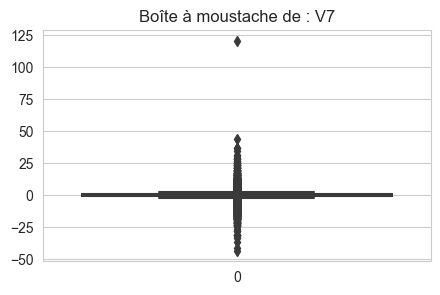

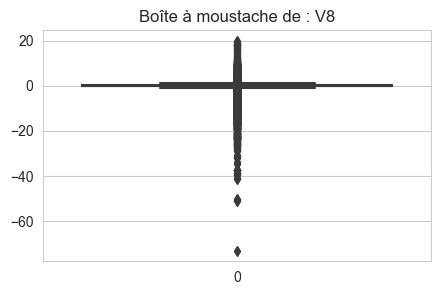

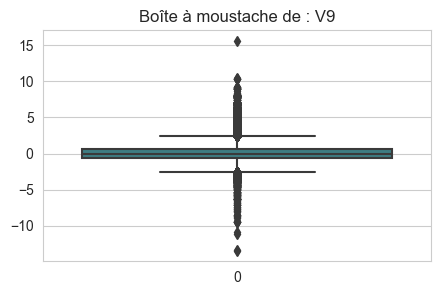

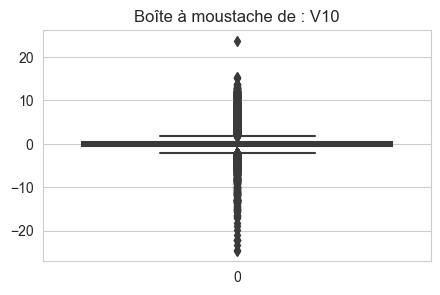

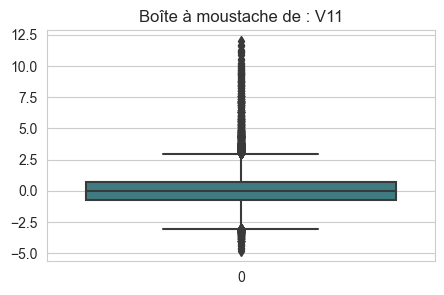

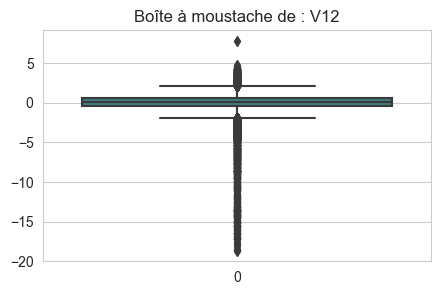

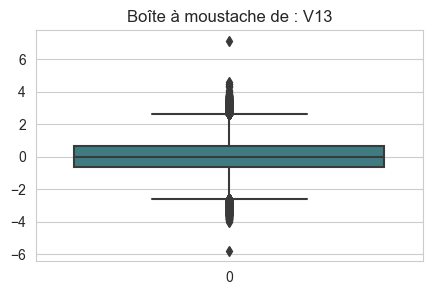

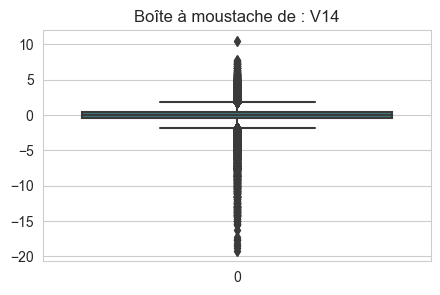

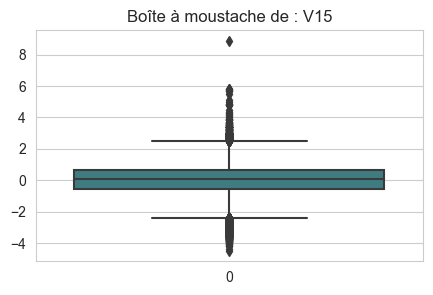

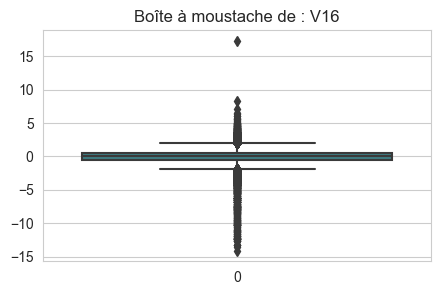

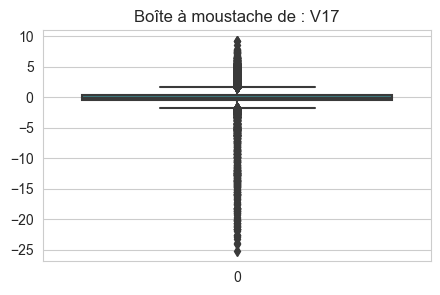

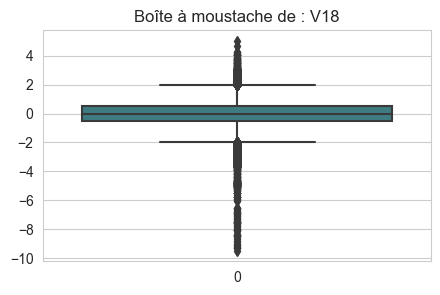

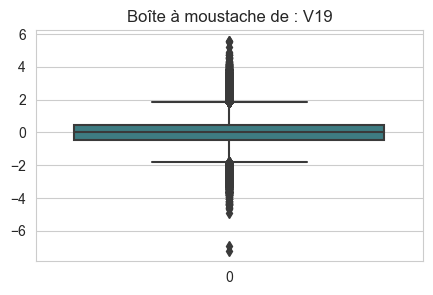

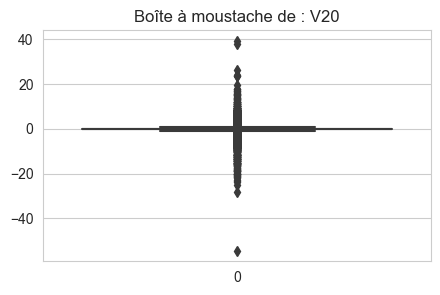

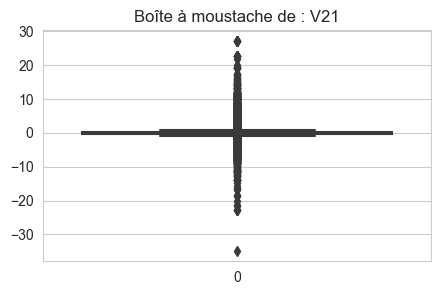

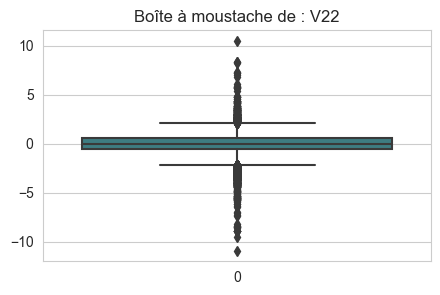

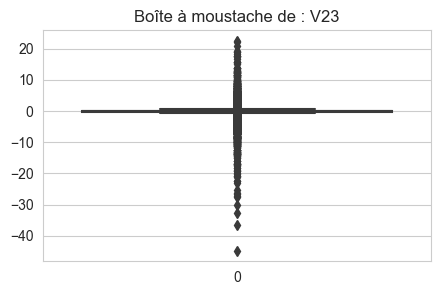

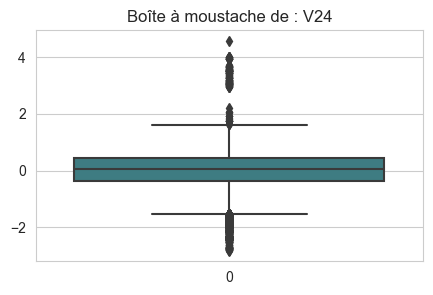

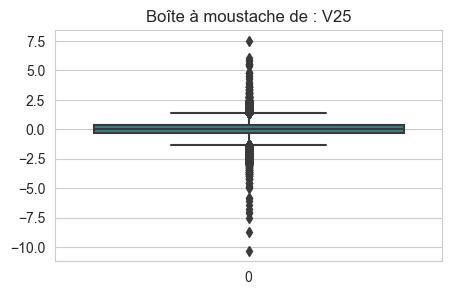

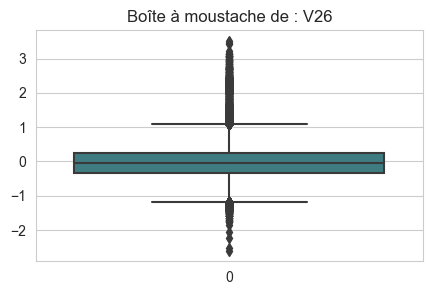

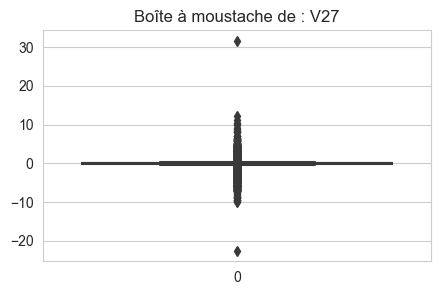

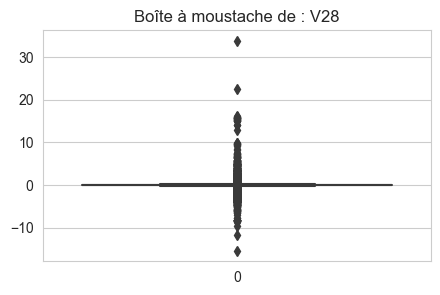

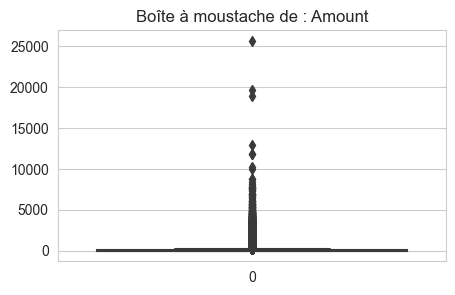

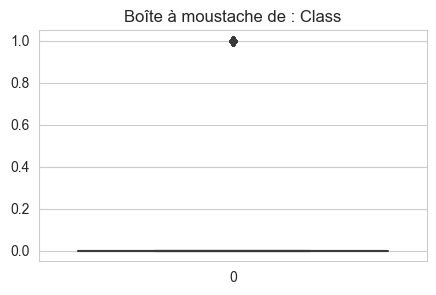

In [13]:
# boites à moustache pour afficher les outliers
for col in data_transac.columns:
    #print(col)
    plt.figure(figsize=(5,3)) 
    sns.boxplot(data_transac[col], showfliers = True,  palette = "crest")
    plt.title('Boîte à moustache de : ' + str(col))

* Nous observons la présence de valeurs aberrantes pratiquement dans toutes les variables;
* Nous pouvons créer une fonction Python simple qui prend notre colonne à partir de la trame de données et génère les valeurs aberrantes;
* Etant donné que les données ne suivent pas une distribution normale, nous calculerons les points de données aberrants à l'aide de la méthode statistique appelée intervalle interquartile (IQR) au lieu d'utiliser le score Z.

In [14]:
# Le nombre de transaction par classe
print(data_transac["Class"].value_counts())
print("========================================")
print(data_transac["Class"].value_counts(normalize = all))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


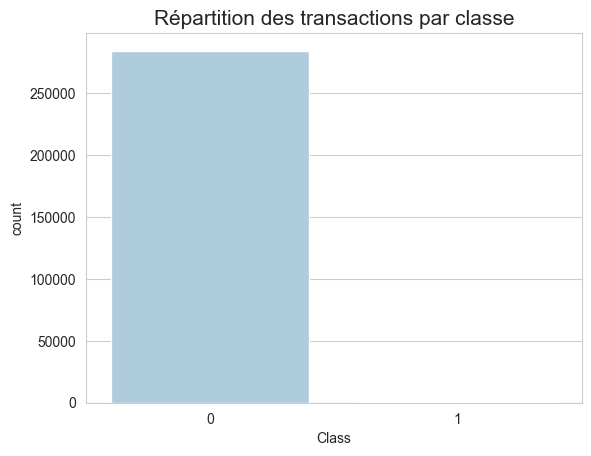

In [15]:
# visualisation des types de clients
sns.countplot(x = data_transac["Class"], order = data_transac["Class"].value_counts(ascending=False).index , palette = "Paired")
plt.title("Répartition des transactions par classe", fontsize=15)
plt.show()

* Nous avons 492 fraudes sur 284 807 transactions. L'ensemble de données est très déséquilibré, la classe positive (fraudes = 1) représentant 0,172% de toutes les transactions par rapport à la classe négative (légitimes = 0) qui représentent 99,82%.

## 2.2. Analyse exploratoire des données

* Nous allons faire une carte de corrélation pour mieux voir les relations qui existent entre les variables.

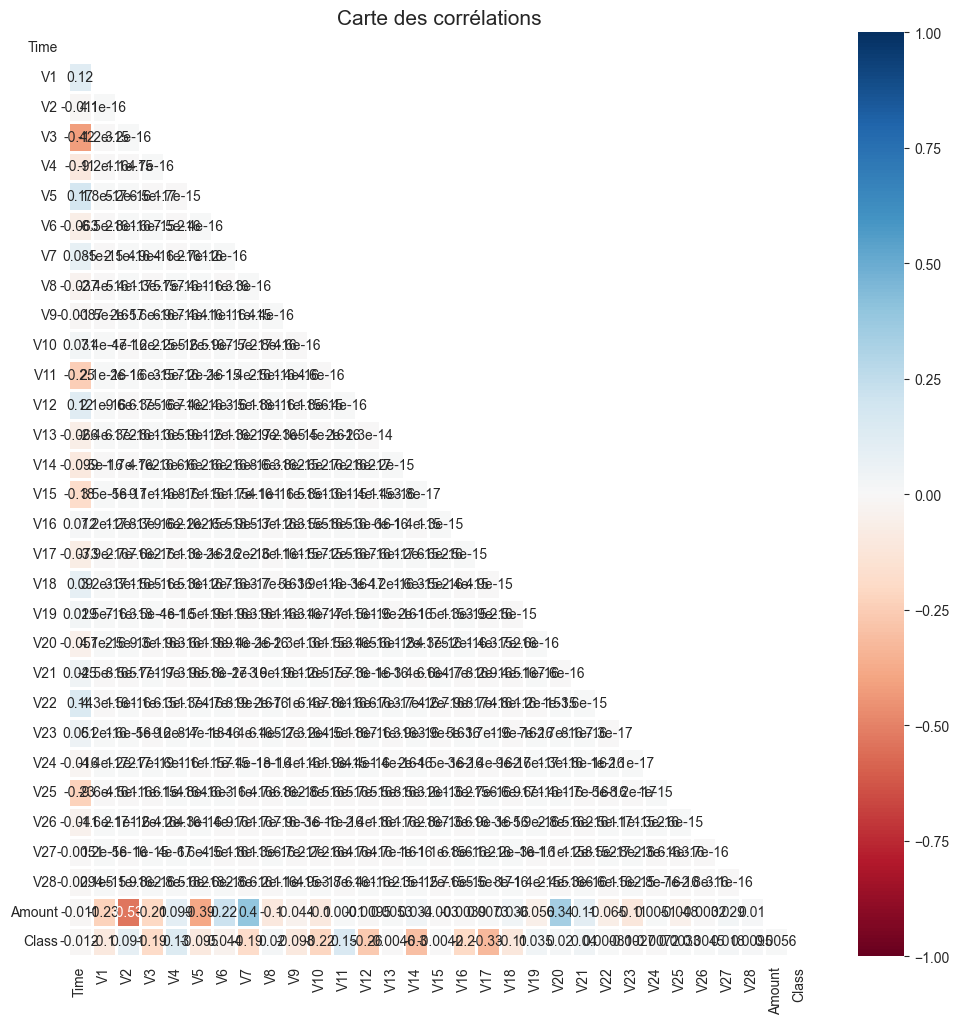

In [16]:
# Visualisation de la matrix de corrélation
plt.figure(figsize = (12, 12))
mask = np.triu(np.ones_like(data_transac.corr(), dtype=bool))
sns.heatmap(data_transac.corr(), mask = mask, cmap='RdBu', vmin = -1, vmax = 1, annot = True, linewidths = 2)
plt.title('Carte des corrélations', fontsize=15)
plt.show()

In [17]:
# Créer une variable de corrélation
corr1 = data_transac.corr()['Class'].sort_values()

# Corrélation négative la plus forte
print('Features avec de fortes corrélation négatives:')
corr1.head(5)

Features avec de fortes corrélation négatives:


V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64

In [18]:
### Corrélation positive la plus forte
print('Features avec de fortes corrélation positives:')
corr1.tail(5)

Features avec de fortes corrélation positives:


V21      0.040413
V2       0.091289
V4       0.133447
V11      0.154876
Class    1.000000
Name: Class, dtype: float64

* Nous observons des variables qui ont de fortes corrélation positives avec la variable cible "Class" ainsi de fortes corrélation négatives.
* A propos des données nous avons la fonctionnalité « Temps = Time » qui contient les secondes écoulées entre chaque transaction, alors qu'on a besoin de l'heure, la minute et le jour de la transaction c'est ainsi que nous allons faire du feature engineering.

## 2.3. Feature engineering

* Feature engineering = l'ingénierie des fonctionnalités est une technique d'apprentissage automatique qui exploite les données pour créer de nouvelles variables qui ne figurent pas dans l'ensemble d'apprentissage. 
* Il peut produire de nouvelles fonctionnalités pour l’apprentissage supervisé et non supervisé, dans le but de simplifier et d’accélérer les transformations de données tout en améliorant la précision des modèles.

In [19]:
# Création de nouvelles variables
# Pour 1h de transaction = 60min = 3600s
data_transac["Time_Hour"] = data_transac["Time"]/3600

# Pour 1 jour de transaction = 24 h = 1400 min = 86400 s.
data_transac["Time_Day"] = data_transac["Time"]/86400

In [20]:
# Afficher les données après feature engineering
data_transac.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour,Time_Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,0.000012
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,0.000012
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,0.000023


In [21]:
# Vérifions les transactions par heure et jour
print("Transaction minimum par heure est de:", data_transac["Time_Hour"].min())
print("=======================================================")
print("Transaction maximum par heure est de:", data_transac["Time_Hour"].max())
print("=======================================================")
print("Transaction minimum par jour est de:", data_transac["Time_Day"].min())
print("=======================================================")
print("Transaction maximum par jour est de:", data_transac["Time_Day"].max())

Transaction minimum par heure est de: 0.0
Transaction maximum par heure est de: 47.99777777777778
Transaction minimum par jour est de: 0.0
Transaction maximum par jour est de: 1.9999074074074075


* Maintenant vérifions la cohérence en traçant la répartition des montants et des heures de transaction.

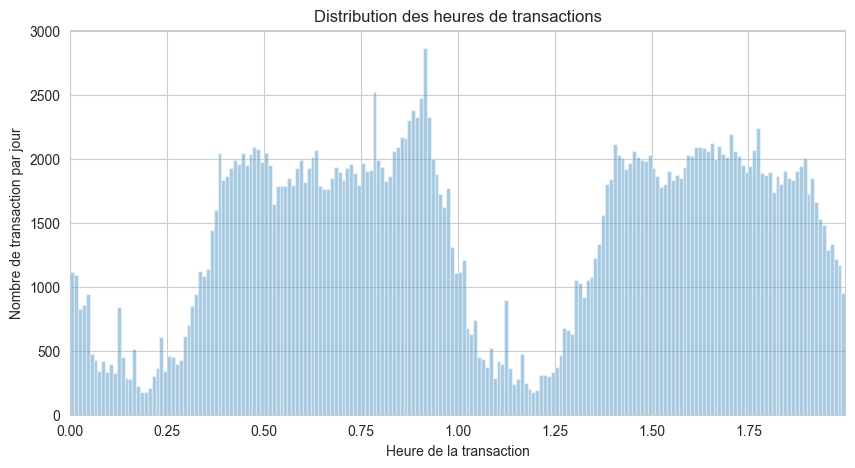

In [22]:
# Visualisation de la variable 
plt.figure(figsize=(10,5)) 
sns.distplot(data_transac["Time_Day"], bins = 200, kde = False)
plt.xlim(data_transac["Time_Day"].min(), data_transac["Time_Day"].max())
#plt.xticks(range(10))
plt.xlabel("Heure de la transaction")
plt.ylabel("Nombre de transaction par jour")
plt.title("Distribution des heures de transactions")
plt.show()

* La répartition des temps de transactions ne suit pas une distribution gaussienne (distribution bimodale) au quotidien.
* Les montants des transactions semblent être répartis de la même manière tout au long de la journée.
* Nous remarquons le moment(l'heure) où nous avons le plus de transactions est de 18h à 21h.

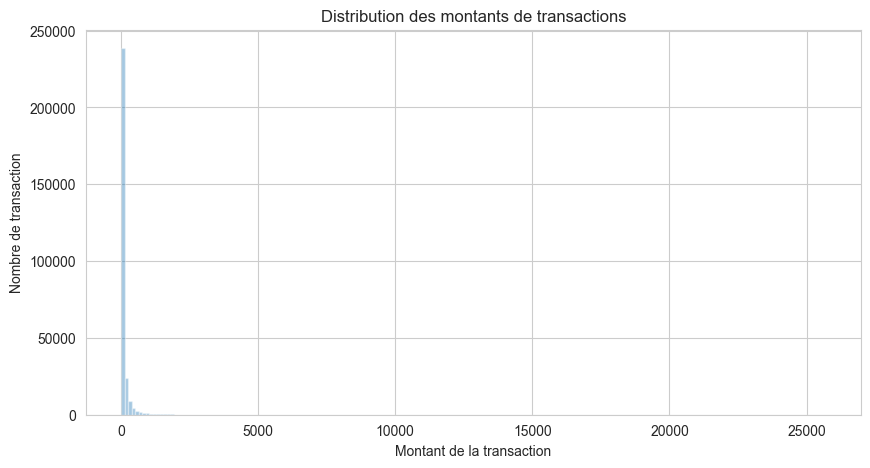

In [23]:
# Visualisation de la variable cible aprés transformation logarithmique
plt.figure(figsize=(10,5)) 
sns.distplot(data_transac["Amount"], bins = 200, kde = False)
plt.xlabel("Montant de la transaction")
plt.ylabel("Nombre de transaction")
plt.title("Distribution des montants de transactions")
plt.show()

* La répartition des montants des transactions a l'essentiel de sa masse pour les petits montant.
* Nous avons une masse pour les petits montant et grands montant c'est à dire que les petits montant peuvent correspondre au café du matin et les grands montant pour le diner du soir.

<Figure size 1000x1000 with 0 Axes>

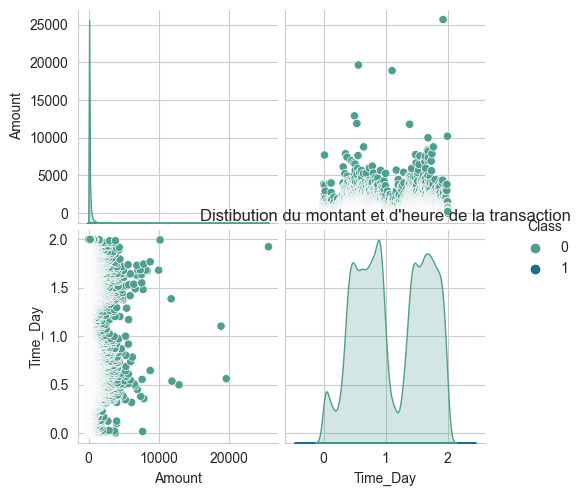

In [24]:
# Visualisation des montants et l'heure de la transaction en fonction de la classe
plt.figure(figsize=(10,10)) 
sns.pairplot(data_transac[["Amount", "Time_Day", "Class"]], hue = "Class", palette = "crest")
plt.title("Distibution du montant et d'heure de la transaction")
plt.show()

* Nous observons que ça soit le montant ou l'heure de la transaction par jour distinguent seulement une transaction légitime, celà est dû à l'ensemble de données très déséquilibrées. 
* Nous avons aussi la répartition des montants des transactions qui est concentrée pour les petits montants, voyons celà avec la visualisation de son boxplot pour observer les outliers.

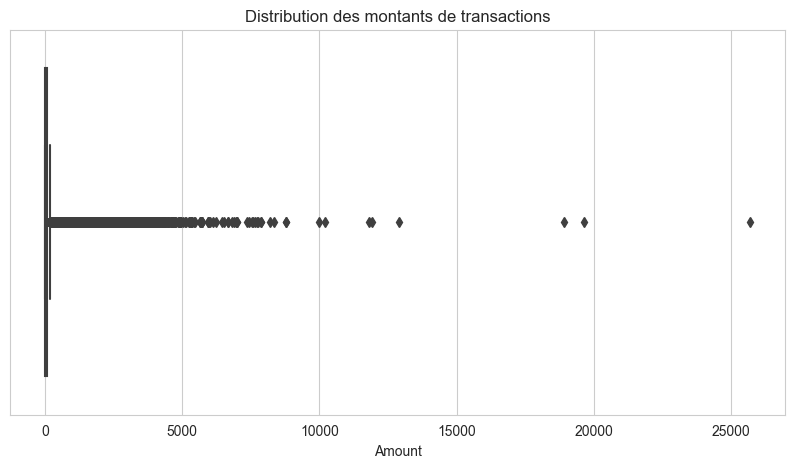

In [25]:
# Visualisation de la variable montant
plt.figure(figsize=(10,5)) 
sns.boxplot(x = data_transac["Amount"])
plt.title("Distribution des montants de transactions")
plt.show()

* La majorité des outliers se trouvent vers la droite, utilisons une fonction pour détecter ces outliers.

## 2.4. Traiter les valeurs aberrantes

In [26]:
# Fonction pour détecter les outliers
def detect_outliers(v):
    Q1 = np.quantile(v,0.25)
    Q3 = np.quantile(v,0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ * 1.5)
    LS = Q1 + (EIQ * 1.5)
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [27]:
# Appel à la fonction pour afficher les valeurs aberrantes
outliers1 = detect_outliers(data_transac["Amount"])
# Afficher les outliers selon leur index
outliers = outliers1[0]

# Afficher le nombre de outliers
print(f"Nombre d'outliers détectés est de : {len(outliers)} ")

Nombre d'outliers détectés est de : 51706 


* Nous avons 51706 sur 284807 (lignes) qui ont tous des valeurs aberrantes;
* Supprimer toutes ces lignes nous fera perdre pas mal d'infomations, les ignorer nous fera aussi biaiser les résultats le mieux est de les traiter en utilisant la médiane qui est moins sensible aux outliers.

In [28]:
# Création de la fonction pour faire une imputation 
def impute_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper = df[~ (df > (Q3 + 1.5 * IQR))].max()
    lower = df[~ (df < (Q1 - 1.5 * IQR))].min()
    df = np.where(df > upper,
      df.median(),
      np.where(
        df < lower,
        df.median(),
        df
        )
      )
    return df

In [29]:
# Remplacer les valeurs aberrantes dans chaque colonne
data_transac["Amount"] = impute_outliers_IQR(data_transac["Amount"])

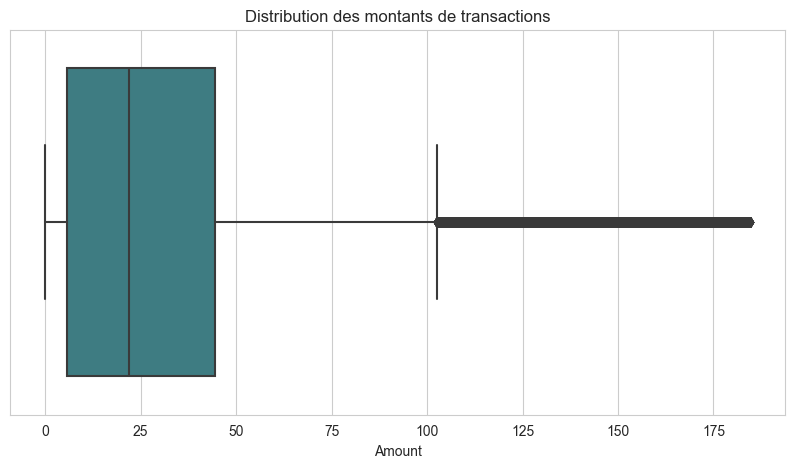

In [30]:
# Visualisation de la variable montant
plt.figure(figsize=(10,5)) 
sns.boxplot(x = data_transac["Amount"], palette = "crest")
plt.title("Distribution des montants de transactions")
plt.show()

In [31]:
# Vérifions après suppression des outliers
data_transac["Amount"].describe()

count    284807.000000
mean         33.521444
std          39.950180
min           0.000000
25%           5.600000
50%          22.000000
75%          44.400000
max         184.500000
Name: Amount, dtype: float64

* Les résultats sont satisfaisant après le traitement des valeurs aberrantes même si nous observons un certain nombre d'outliers élevés.

# 3. Modélisation

## 3.1. Préparation des données

In [32]:
# Features
X = data_transac.drop(columns = ["Class"], axis = 1)

# Variable cible
y = data_transac["Class"]

# Afficher le nombre de lignes et colonnes des données
print(X.shape)
print(y.shape)

(284807, 32)
(284807,)


In [33]:
# Données d'entrainement et de test
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (213605, 32)
X_test shape: (71202, 32)
y_train shape: (213605,)
y_test shape: (71202,)


* Nous avons séparer nos données en données d'entraiment et données test (avec 25%).
* Ensuite essayer plusieurs algorithmes de machine learning.
* Avant tout nous allons faire du StandardScaler (ramener les données entre -1 et 1) pour centrer et réduire les données.

In [34]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X1_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X1_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

## 3.2 Essai de plusieurs algorithme

* Création d'une fonction pour afficher les différentes metrics avec de nouvels modèle

In [35]:
# Créer des listes
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()
# Calcul la précision moyenne à partir des scores de prédiction
AUPRC = list()


# Stocker les résultats dans un dataframe
results = pd.DataFrame(columns = ['Model Type','AUC - Score', 'AUC - Test', 'AUPRC', 'Hyperparameters'])

In [36]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob = clf_model.predict_proba(X_test)
    y_pred = clf_model.predict(X_test)
    #y_score = lr_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    print('='*60)
    print('AUPRC')
    print('='*60)
    print(average_precision_score(y_test, y_prob[:,1]))
    print('='*60)
   
    # Faire appelle aux différentes listes
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    AUPRC.append(average_precision_score(y_test, y_prob[:,1]))
    resample.append(sampling)

### 3.2.1 Modèle Logistic Regression

In [37]:
%%time
lr_clf = LogisticRegression(max_iter = 400, solver = 'lbfgs')   

lr_parameters = {'C':np.logspace(-10, 1, 15),
                 'class_weight':[None,'balanced'],
                 'penalty':['l1','l2']
                }
cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)

lr_grid = RandomizedSearchCV(lr_clf, lr_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'Logistic Regression',
                          'AUC - Score' : lr_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]),
                          'AUPRC': average_precision_score(y_test, lr_model.predict_proba(X_test)[:, 1]),
                          'Hyperparameters' : lr_grid.best_params_},
                        ignore_index=True)
results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 6.05 s
Wall time: 20.8 s


,Model Type,AUC - Score,AUC - Test,AUPRC,Hyperparameters
0,Logistic Regression,0.977033,0.972324,0.684147,"{'penalty': 'l2', 'class_weight': 'balanced', ..."


In [38]:
# Appel à la fonction
test_eval(lr_grid, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[68676  2403]
 [   14   109]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.89      0.08       123

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.97      0.98     71202
 

AUC-ROC
0.9723235923111775
AUPRC
0.6841468724756343


* Le recall des transactions légitimes est de 97% , celà signifie qu'il y'a un taux élevé de transactions légitimes.
* Tandisque , le modèle prédit bien que 89% des transactions sont des fraudes.
* Pas mal (résultat satisfaisant) pour une première essai d'un modèle d'algorithme.
* Pour celà nous allons tester d'autres modèles.

### 3.2.2 Modèle Random Forest

In [39]:
%%time
estimators = [10,20]
#estimators = [50,100]
# Nombre maximum de profondeur dans chaque arbre :
max_depth = [i for i in range(5,16,2)]
# Nombre minimum d'échantillons à prendre en compte pour scinder un nœud :
min_samples_split = [2, 5]
# Nombre minimum d'échantillons à considérer à chaque nœud feuille :
min_samples_leaf = [1, 2]


rf_clf = RandomForestClassifier(random_state = 42, n_estimators=100)
rf_parameters = {'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

rf_grid = RandomizedSearchCV(rf_clf, rf_parameters, cv=cv, refit='True', n_jobs=-1, verbose=1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'Random Forest',
                          'AUC - Score' : rf_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
                          'AUPRC': average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
                          'Hyperparameters' : rf_grid.best_params_},
                        ignore_index=True)

results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 39.3 s
Wall time: 5min 27s


,Model Type,AUC - Score,AUC - Test,AUPRC,Hyperparameters
0,Logistic Regression,0.977033,0.972324,0.684147,"{'penalty': 'l2', 'class_weight': 'balanced', ..."
1,Random Forest,0.974386,0.974805,0.820043,"{'n_estimators': 20, 'min_samples_split': 5, '..."


In [40]:
# Appelle à la fonction
test_eval(rf_grid, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[71074     5]
 [   27    96]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202
 

AUC-ROC
0.9748054866696474
AUPRC
0.8200433891196551


* Le recall des transactions légitimes est de 100% , cela signifie qu'il y'a un taux élevé de transactions légitimes et le modèle prédit que 100% des transactions sont légitimes.
* Tandisque , le modèle prédit bien que 78% des transactions sont des fraudes.

### 3.2.3 Modèle Gradient Boosting

In [41]:
%%time
import xgboost as xgb

XGB_clf = xgb.XGBClassifier() 
XGB_parameters = {
    'max_depth': range(1, 3, 5),
    'n_estimators': range(10, 50, 100),
    'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5]}

XGB_grid = RandomizedSearchCV(XGB_clf, XGB_parameters, cv=cv, n_jobs=-1, verbose=1, scoring='roc_auc')
XGB_grid.fit(X_train, y_train)
XGB_model = XGB_grid.best_estimator_

# update model scoreboard
results = results.append({'Model Type' : 'XG Boost',
                          'AUC - Score' : XGB_grid.best_score_,
                          'AUC - Test' : roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:,1]),
                          'AUPRC': average_precision_score(y_test, XGB_model.predict_proba(X_test)[:, 1]),
                          'Hyperparameters' : XGB_grid.best_params_},
                        ignore_index=True)

results

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 4.31 s
Wall time: 15 s


,Model Type,AUC - Score,AUC - Test,AUPRC,Hyperparameters
0,Logistic Regression,0.977033,0.972324,0.684147,"{'penalty': 'l2', 'class_weight': 'balanced', ..."
1,Random Forest,0.974386,0.974805,0.820043,"{'n_estimators': 20, 'min_samples_split': 5, '..."
2,XG Boost,0.971571,0.952569,0.770158,"{'n_estimators': 10, 'max_depth': 1, 'learning..."


In [42]:
# Appelle à la fonction
test_eval(XGB_grid, X_test, y_test, 'Gradient Boosting', 'actual')

Confusion Matrix
[[71063    16]
 [   34    89]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.72      0.78       123

    accuracy                           1.00     71202
   macro avg       0.92      0.86      0.89     71202
weighted avg       1.00      1.00      1.00     71202
 

AUC-ROC
0.95256852074704
AUPRC
0.7701577694309418


* Le recall des transactions légitimes est de 100% , celà signifie que le modèle a encore détecter 100% des transactions sont légitimes.
* Tandisque, le modèle prédit bien que 72% des transactions sont des fraudes.

## 3.3. Comparaison des modèles

In [43]:
# Afficher les résultats
results

,Model Type,AUC - Score,AUC - Test,AUPRC,Hyperparameters
0,Logistic Regression,0.977033,0.972324,0.684147,"{'penalty': 'l2', 'class_weight': 'balanced', ..."
1,Random Forest,0.974386,0.974805,0.820043,"{'n_estimators': 20, 'min_samples_split': 5, '..."
2,XG Boost,0.971571,0.952569,0.770158,"{'n_estimators': 10, 'max_depth': 1, 'learning..."


In [44]:
# Appelle à la fonction sous forme de dataframe
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC,
                            'AUPRC':AUPRC})

In [45]:
# Affichage des résultats
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC,AUPRC
0,Logistic Regression,actual,0.043392,0.886179,0.082732,0.972324,0.684147
1,Random Forest,actual,0.950495,0.780488,0.857143,0.974805,0.820043
2,Gradient Boosting,actual,0.847619,0.723577,0.780702,0.952569,0.770158


* La précision de la matrice de confusion n'est pas significative pour une classification déséquilibrée.
* Nous allons mesurer la précision à l’aide de l’aire sous la courbe de précision-rappel (AUPRC).

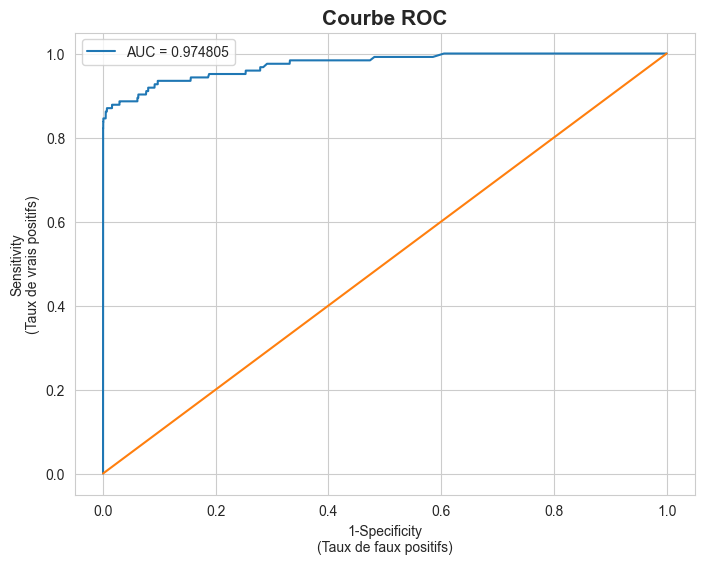

In [46]:
# Visualisation de la courbe ROC
# en prenant toutes les lignes ( :) mais en gardant la deuxième colonne ( 1)
probabilities = rf_model.predict_proba(X_test)[:,1]
# un seuil de classification à partir duquel on considère que la probabilité est significative
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Courbe ROC', fontsize = 15, fontweight = "bold")
plt.xlabel("1-Specificity" "\n" "(Taux de faux positifs)")
plt.ylabel("Sensitivity" "\n" "(Taux de vrais positifs)")
plt.legend(["AUC = %.6f"%auc])
plt.show()

* Nous obtenons un AUC égale à 97.48% sur les données test, celà montre nous avons une très bonne performance de notre modèle (Random Forest) qui est capable de détecter les transactions légitimes anisi les transactions frauduleuses.

## 3.4 Sauvegarde et déploiement du modéle

In [47]:
# Afficher les différentes paramètres
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 11}
RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20, random_state=42)


* Dans ce qui suit, nous appliquerons la méthode de sous-échantillonnage afin de régler le problème de déséquilibre de classe.

## 4. Methode de sur échantillonnage

### 4.1 Technique SMOTE ( Synthetitic Minority Oversample)

* SMOTE est une technique de suréchantillonnage où les échantillons synthétiques sont générés pour la classe minoritaire. Cet algorithme permet de surmonter le problème de surajustement posé par le suréchantillonnage aléatoire. Il se concentre sur l'espace des fonctionnalités pour générer de nouvelles instances à l'aide d'une interpolation entre les instances positives qui se trouvent ensemble.

### 4.1.1 Préparation des données

In [48]:
# Données d'entrainement et de test
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state= seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (199364, 32)
X_test shape: (85443, 32)
y_train shape: (199364,)
y_test shape: (85443,)


In [49]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [50]:
# Initiation de la fonction avant le suréchantillonnage
counter = Counter(y_train)
print('Before',counter)
# Suréchantillonnage de l'ensemble de données du train à l'aide de SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Appel à la fonction après le suréchantillonnage
counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 199020, 1: 344})
After Counter({0: 199020, 1: 199020})


In [51]:
# Vérification après rechantillonnage
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

### 4.1.2 Modélisation après le suréchantillonnage

* Nous avons le modèle Random Forest qui a un AUC plus élevé parmis les autres modèles testés, nous allons continuer notre modélisation en choisissant les meilleurs paramètres ou estimateurs.

In [52]:
# Entraînement du modèle final avec les meilleures hyperparamètres
Final_model = RandomForestClassifier(max_depth = 13, min_samples_leaf = 2, n_estimators = 10, random_state = 42)

Final_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, n_estimators=10,
                       random_state=42)

### 4.1.3 Sauvegarde et déploiement du modéle

In [53]:
# Sauvegarde du modèle 
import pickle
pickle.dump(Final_model, open("Random_Forest_model.pkl", "wb"))

In [54]:
# Chargement du modèle pour faire de nouvelles prédictions
RF_model = pickle.load(open("Random_Forest_model.pkl", "rb"))

In [55]:
# Afficher les différentes métriques (aprés la recherche aléatoire)
# Prédire les étiquettes de classe pour les échantillons dans X.
y_prob = RF_model.predict_proba(X_test)
# Estimations de probabilité pour chaque cible
y_pred = RF_model.predict(X_test)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred),"\n")
print('='*60)
print("precision")
print(precision_score(y_test,y_pred), "\n")
print('='*60)
print("recall")
print(recall_score(y_test,y_pred), "\n")
print('='*60)
print('AUC-Score')
print(lr_grid.best_score_, "\n")
print('='*60)
print('AUC-ROC Test')
print(roc_auc_score(y_test, y_prob[:,1]), "\n")
print('='*60)
print('AUPRC')
print('='*60)
print(average_precision_score(y_test, y_prob[:,1]), "\n")
print('='*60)
print("F1 score")
print(f1_score(y_test,y_pred), "\n")
print('='*60)
print('Hyperparamètres')
print(lr_grid.best_params_, "\n")
print('='*60)
print('Meilleurs estimateurs')
print(lr_grid.best_estimator_, "\n")
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", RF_model.score(X_train_sm, y_train_sm))
print("Le score sur les données d'évaluation est :", RF_model.score(X_test, y_test))

Confusion Matrix
[[85226    69]
 [   29   119]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.63      0.80      0.71       148

    accuracy                           1.00     85443
   macro avg       0.82      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443
 

precision
0.6329787234042553 

recall
0.8040540540540541 

AUC-Score
0.9770331082829177 

AUC-ROC Test
0.9563409106392282 

AUPRC
0.7679943769782027 

F1 score
0.7083333333333334 

Hyperparamètres
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 1.6378937069540613} 

Meilleurs estimateurs
LogisticRegression(C=1.6378937069540613, class_weight='balanced', max_iter=400) 

Le score sur les données d'entraînement est : 0.9993668977992162
Le score sur les données d'évaluation est : 0.9988530365272755


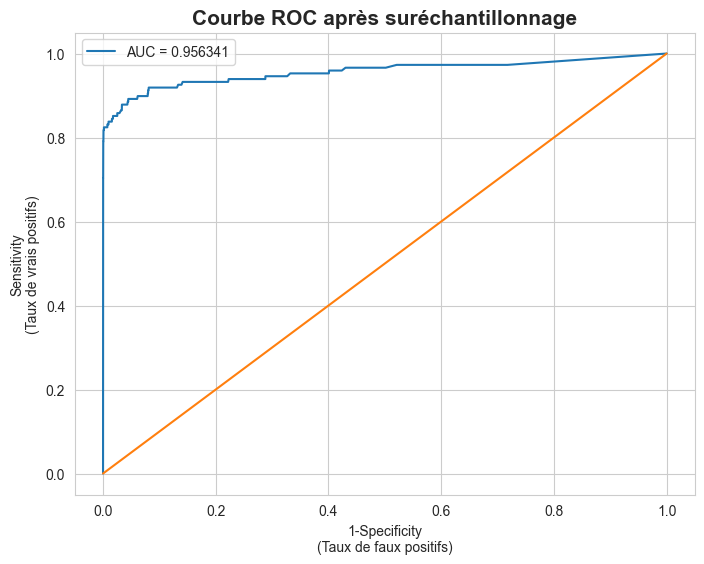

In [56]:
# Visualisation de la courbe ROC
# en prenant toutes les lignes ( :) mais en gardant la deuxième colonne ( 1)
probabilities = RF_model.predict_proba(X_test)[:,1]
# un seuil de classification à partir duquel on considère que la probabilité est significative
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)               
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)                                        
plt.plot([0, 1], [0, 1])                                 
plt.title('Courbe ROC après suréchantillonnage', fontsize = 15, fontweight = "bold")
plt.xlabel("1-Specificity" "\n" "(Taux de faux positifs)")
plt.ylabel("Sensitivity" "\n" "(Taux de vrais positifs)")
plt.legend(["AUC = %.6f"%auc])
plt.show()

# 5. Conclusion

* Après la technique du suréchantillonnage puis l'entrainement de nos données avec le meilleur modèle (Random Forest), nous obtenons un nouveau AUC égale à 95.63% (AUC = 97,48% avant suréchantillonnage) sur les données test;
* Celà montre nous avons une très bonne performance de notre modèle (Random Forest) qui est capable de détecter les transactions légitimes anisi les transactions frauduleuses.

In [5]:
data = data_transac.iloc[0:40000]
data.to_csv('FINAL_DATASET.csv', index = False)